### Compare to HYDRUS-1D
This notebooks presents steps to replicate the estimated evapotranspiration from example 4 in the HYDRUS tutorial 

Rassam, D., Šimůnek, J., Mallants, D., & van Genuchten, M. T. (2018). The HYDRUS-1D software package for simulating the one-dimensional movement of water, heat, and multiple solutes in variably-saturated media: Tutorial. Riverside: CSIRO Land and Water. 

Author: M. Vremec, University of Graz, 2021

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pyet as pyet

### Import imput data

In [32]:
meteo = pd.read_csv("data/meteod.csv", parse_dates=True, index_col=0, dayfirst=True)
tmax = meteo.loc[:,"tmax"]
tmin = meteo.loc[:,"tmin"]
rh = meteo.loc[:,"rh"]
wind = meteo.loc[:,"wind"] / 86.4
solar = meteo.loc[:,"solar"]
elevation = 145.93
latitude = -17.94 
lat = lat * np.pi / 180

### Estimate ET with pm1990 as implemented in HYDRUS

In [52]:
et_pm = pyet.pm(wind, elevation=elevation, lat=lat, rs=solar, tmax=tmax, tmin=tmin, rh=rh, croph=0.6, ra_method=2, lai=0.6*24)

In [53]:
et_pm.sum()

1412.5777043833486

In [48]:
0.6*24

14.399999999999999

<AxesSubplot:xlabel='date'>

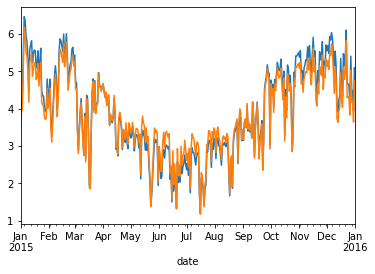

In [49]:
#et_pm
meteo.et.plot()
et_pm.plot()

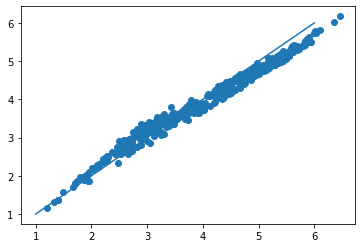

In [50]:
plt.scatter(meteo.et, et_pm)
plt.plot([1,6], [1,6])